In [1]:
import numpy as np
from os.path import expanduser
from wlenet import config
from wlenet.models.utils import load_spec, print_spec
from wlenet.models.batch import train_a_spec

/cs/phd/springer/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


{'arch_name': 'cnn_image_tanh',
 'kwargs_arch': {'dropout_dense_rate': 0.3, 'out_dim': 2, 'use_discriminator': False, 'use_dropout_dense': True},
 'kwargs_dataset': {'noise_kernel_factor': 1.0,
                    'noise_kernel_name': 'clash',
                    'post_sim': {'flux_cut_min': -inf, 'flux_factor': 0.32, 'intensity_cutoff': 0.012},
                    'sim_names_test': ['low_002', 'med_002', 'hig_002', 'low_004', 'med_004', 'hig_004'],
                    'sim_names_train': ['low_002', 'med_002', 'hig_002', 'low_004', 'med_004', 'hig_004'],
                    'target_header_path': None},
 'kwargs_train': {'epochs': 100, 'label_loss': 'mean_squared_error', 'patience': 10},
 'trained_name': 'cnn_image_tanh_clash_uniform_mse'}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 32, 32, 1)         0         
_____________________________________________________

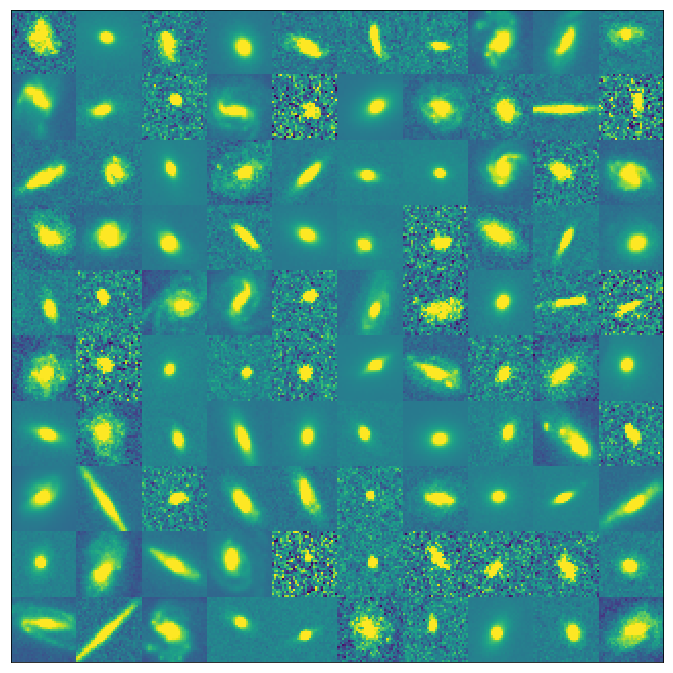

Epoch 1/100
 - 21s - loss: 0.0109 - val_loss: 0.0102
Epoch 2/100
 - 20s - loss: 0.0104 - val_loss: 0.0102
Epoch 3/100
 - 20s - loss: 0.0103 - val_loss: 0.0100
Epoch 4/100
 - 20s - loss: 0.0103 - val_loss: 0.0101
Epoch 5/100
 - 20s - loss: 0.0102 - val_loss: 0.0102
Epoch 6/100
 - 20s - loss: 0.0102 - val_loss: 0.0100
Epoch 7/100
 - 20s - loss: 0.0102 - val_loss: 0.0100
Epoch 8/100
 - 20s - loss: 0.0101 - val_loss: 0.0099
Epoch 9/100
 - 20s - loss: 0.0102 - val_loss: 0.0100
Epoch 10/100
 - 20s - loss: 0.0101 - val_loss: 0.0099
Epoch 11/100
 - 20s - loss: 0.0101 - val_loss: 0.0100
Epoch 12/100
 - 20s - loss: 0.0101 - val_loss: 0.0099
Epoch 13/100
 - 20s - loss: 0.0101 - val_loss: 0.0099
Epoch 14/100
 - 20s - loss: 0.0101 - val_loss: 0.0100
Epoch 15/100
 - 20s - loss: 0.0101 - val_loss: 0.0099
Epoch 16/100
 - 20s - loss: 0.0101 - val_loss: 0.0099
Epoch 17/100
 - 20s - loss: 0.0101 - val_loss: 0.0099
Epoch 18/100
 - 20s - loss: 0.0101 - val_loss: 0.0099
Epoch 19/100

Epoch 00019: reducing l

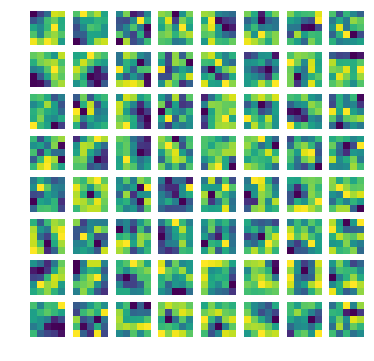

step biases c1: -0.001, m1: -0.745, c2: 0.000, m2: -0.740
rmse1: 0.191, rmse2: 0.187, (rmse1 + rmse2)/2: 0.189


({'arch_name': 'cnn_image_tanh',
  'calib': {'ptta': (-0.0005931242965987252,
    -0.7454612508331031,
    4.513500624716105e-05,
    -0.7398965334994978)},
  'kwargs_arch': {'dropout_dense_rate': 0.3,
   'out_dim': 2,
   'use_discriminator': False,
   'use_dropout_dense': True},
  'kwargs_dataset': {'noise_kernel_factor': 1.0,
   'noise_kernel_name': 'clash',
   'post_sim': {'flux_cut_min': -inf,
    'flux_factor': 0.32,
    'intensity_cutoff': 0.012},
   'sim_names_test': ['low_002',
    'med_002',
    'hig_002',
    'low_004',
    'med_004',
    'hig_004'],
   'sim_names_train': ['low_002',
    'med_002',
    'hig_002',
    'low_004',
    'med_004',
    'hig_004'],
   'target_header_path': None},
  'kwargs_train': {'epochs': 100,
   'label_loss': 'mean_squared_error',
   'patience': 10},
  'trained_name': 'cnn_image_tanh_clash_uniform_mse'},
 <keras.engine.training.Model at 0x7f13643484e0>)

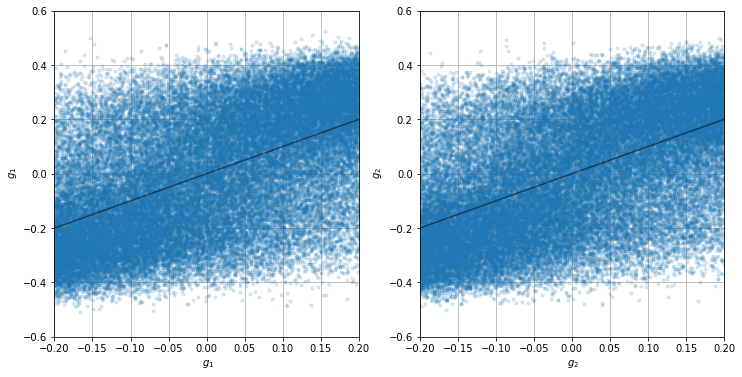

In [2]:
model_spec = {'arch_name': 'cnn_image_tanh',
              'kwargs_arch': {'dropout_dense_rate': 0.3, 'out_dim': 2, 'use_discriminator': False, 'use_dropout_dense': True},
              'kwargs_dataset': {'noise_kernel_factor': 1.0,
                                 'noise_kernel_name': 'clash',
                                 'sim_names_test': ['low_002', 'med_002', 'hig_002', 'low_004', 'med_004', 'hig_004'],
                                 'sim_names_train': ['low_002', 'med_002', 'hig_002', 'low_004', 'med_004', 'hig_004'],
                                 'target_header_path': None},
              'kwargs_train': {'epochs': 100, 'label_loss': 'mean_squared_error', 'patience': 10},
              'trained_name': 'cnn_image_tanh_clash_uniform_mse'}

post_sim_path = config['calibration_path'] + '/cosmos_to_clash_post_sim.npy'
model_spec['kwargs_dataset']['post_sim'] = np.load(expanduser(post_sim_path)).item()
model_spec['kwargs_dataset']['post_sim']['flux_factor'] = 0.32

train_a_spec(model_spec, do_train=True, save_calib=True, show_figures=True)